In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.io

In [2]:
dataset_1 = scipy.io.loadmat('ex6data1.mat')
dataset_2 = scipy.io.loadmat('ex6data2.mat')
dataset_3 = scipy.io.loadmat('ex6data3.mat')

In [4]:
X_1 = dataset_1['X']
y_1 = dataset_1['y']

In [5]:
print(y_1.shape)

(51, 1)


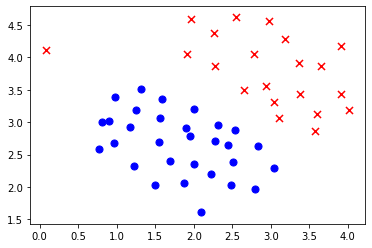

In [6]:
m = X_1.shape[0]
pos,neg= (y_1==1).reshape(m,1), (y_1==0).reshape(m,1)
plt.scatter(X_1[pos[:,0],0],X_1[pos[:,0],1],c="r",marker="x",s=50)
plt.scatter(X_1[neg[:,0],0],X_1[neg[:,0],1],c="b",marker="o",s=50)

In [10]:
from sklearn.svm import SVC
clf = SVC(C=1, kernel='linear')
clf.fit(X_1, np.ravel(y_1))

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
# Calculate the decision boundary
xs=np.linspace(-1, 8)
f_0 = clf.intercept_[0]
f_1 = clf.coef_[0, 0]
f_2 = clf.coef_[0, 1]
db_1 = -f_1 * xs/f_2 - f_0 / f_2

In [42]:
# Store support vectors
svs = clf.support_vectors_
a = -f_1/f_2
# Calculate margins
c = svs[0]
margin_low = a * (xs - c[0]) + c[1] # line of slope "a" passing through point "(c[0], c[1])"
c = svs[-2]
margin_high = a * (xs - c[0]) + c[1]

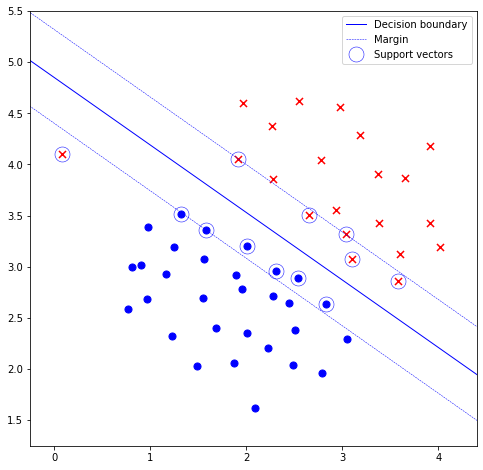

In [43]:
# plotting the decision boundary
plt.figure(figsize=(8,8))
plt.scatter(X_1[pos[:,0],0],X_1[pos[:,0],1],c="r",marker="x",s=50)
plt.scatter(X_1[neg[:,0],0],X_1[neg[:,0],1],c="b",marker="o",s=50)
plt.plot(xs, db_1, 'b-', lw=1, label='Decision boundary')
plt.xlim(-0.25, 4.4)
plt.ylim(1.25, 5.5)
plt.plot(xs, margin_low, 'b--', lw=0.5, label='Margin')
plt.plot(xs, margin_high, 'b--', lw=0.5)
plt.plot(svs.T[0], svs.T[1], marker='o', ls='none', ms=15, mfc='none', mec='b', mew=0.5, label='Support vectors')
plt.legend(numpoints = 1, loc = 1)

# SVM with Gaussian kernels


In [228]:
X_2 = dataset_2['X']
y_2 = dataset_2['y']
print(X_2.shape)
print(y_2.shape)

(863, 2)
(863, 1)


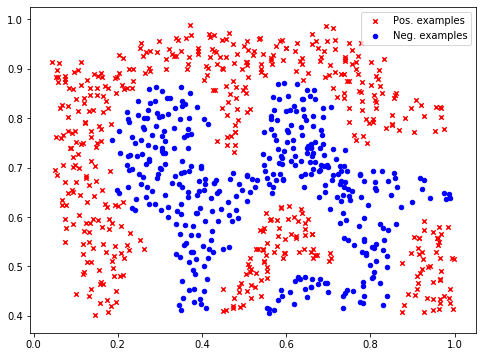

In [229]:
m= X_2.shape[0]
plt.figure(figsize=(8,6))
pos,neg= (y_2==1).reshape(m,1), (y_2==0).reshape(m,1)
plt.scatter(X_2[pos[:,0],0],X_2[pos[:,0],1],c="r",marker="x",s=20, label='Pos. examples')
plt.scatter(X_2[neg[:,0],0],X_2[neg[:,0],1],c="b",marker="o",s=20, label='Neg. examples')
plt.legend()

In [230]:
sigma = 0.1
gamma =  0.5/ (sigma*sigma)
clf = SVC(C=1, gamma=gamma, kernel='rbf')
clf.fit(X_2, np.ravel(y_2))

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=49.99999999999999,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [234]:
x_0_pts, x_1_pts = np.linspace(0, 1, 1000), np.linspace(0, 1, 1000)
x_0_pts_mesh, x_1_pts_mesh = np.meshgrid(x_0_pts, x_1_pts)

In [235]:
z = clf.predict(np.vstack((x_0_pts_mesh.ravel(), x_1_pts_mesh.ravel())).T).reshape(x_0_pts_mesh.shape)

C:\Users\Asus pc\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: No contour levels were found within the data range.
  after removing the cwd from sys.path.


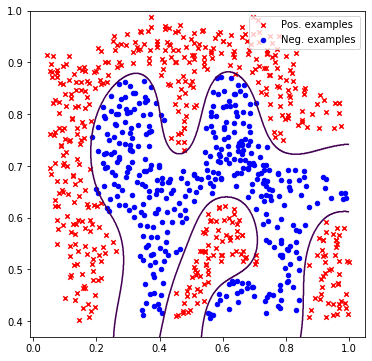

In [236]:
plt.figure(figsize=(6, 6))
plt.scatter(X_2[pos[:,0],0],X_2[pos[:,0],1],c="r",marker="x",s=20, label='Pos. examples')
plt.scatter(X_2[neg[:,0],0],X_2[neg[:,0],1],c="b",marker="o",s=20, label='Neg. examples')
plt.contour(x_0_pts, x_1_pts, z,[0])
plt.xlim(-0.01, 1.05)
plt.ylim(0.37, 1.0)
plt.legend()

In [187]:
x_0_pts_mesh.shape

(5, 5)

In [188]:
x_0_pts_mesh.ravel().shape

(25,)

In [189]:
x_0_pts_mesh

array([[0.  , 0.25, 0.5 , 0.75, 1.  ],
       [0.  , 0.25, 0.5 , 0.75, 1.  ],
       [0.  , 0.25, 0.5 , 0.75, 1.  ],
       [0.  , 0.25, 0.5 , 0.75, 1.  ],
       [0.  , 0.25, 0.5 , 0.75, 1.  ]])

In [191]:
x_1_pts_mesh

array([[0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.25, 0.25, 0.25, 0.25, 0.25],
       [0.5 , 0.5 , 0.5 , 0.5 , 0.5 ],
       [0.75, 0.75, 0.75, 0.75, 0.75],
       [1.  , 1.  , 1.  , 1.  , 1.  ]])

In [194]:
clf.predict(np.vstack((x_0_pts_mesh.ravel(), x_1_pts_mesh.ravel())).T).shape

(25,)

In [201]:
x_0_pts_mesh.ravel()

array([0.  , 0.25, 0.5 , 0.75, 1.  , 0.  , 0.25, 0.5 , 0.75, 1.  , 0.  ,
       0.25, 0.5 , 0.75, 1.  , 0.  , 0.25, 0.5 , 0.75, 1.  , 0.  , 0.25,
       0.5 , 0.75, 1.  ])

In [202]:
x_1_pts_mesh.ravel()

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.25, 0.25, 0.25, 0.25, 0.5 ,
       0.5 , 0.5 , 0.5 , 0.5 , 0.75, 0.75, 0.75, 0.75, 0.75, 1.  , 1.  ,
       1.  , 1.  , 1.  ])

In [203]:
clf.predict(np.vstack((x_0_pts_mesh.ravel(), x_1_pts_mesh.ravel())).T)

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1], dtype=uint8)

In [204]:
np.vstack((x_0_pts_mesh.ravel(), x_1_pts_mesh.ravel()))

array([[0.  , 0.25, 0.5 , 0.75, 1.  , 0.  , 0.25, 0.5 , 0.75, 1.  , 0.  ,
        0.25, 0.5 , 0.75, 1.  , 0.  , 0.25, 0.5 , 0.75, 1.  , 0.  , 0.25,
        0.5 , 0.75, 1.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.25, 0.25, 0.25, 0.25, 0.5 ,
        0.5 , 0.5 , 0.5 , 0.5 , 0.75, 0.75, 0.75, 0.75, 0.75, 1.  , 1.  ,
        1.  , 1.  , 1.  ]])

In [205]:
np.vstack((x_0_pts_mesh.ravel(), x_1_pts_mesh.ravel())).T

array([[0.  , 0.  ],
       [0.25, 0.  ],
       [0.5 , 0.  ],
       [0.75, 0.  ],
       [1.  , 0.  ],
       [0.  , 0.25],
       [0.25, 0.25],
       [0.5 , 0.25],
       [0.75, 0.25],
       [1.  , 0.25],
       [0.  , 0.5 ],
       [0.25, 0.5 ],
       [0.5 , 0.5 ],
       [0.75, 0.5 ],
       [1.  , 0.5 ],
       [0.  , 0.75],
       [0.25, 0.75],
       [0.5 , 0.75],
       [0.75, 0.75],
       [1.  , 0.75],
       [0.  , 1.  ],
       [0.25, 1.  ],
       [0.5 , 1.  ],
       [0.75, 1.  ],
       [1.  , 1.  ]])

In [207]:
clf.predict(np.vstack((x_0_pts_mesh.ravel(), x_1_pts_mesh.ravel())).T)

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1], dtype=uint8)